In [2]:
import geopandas as gpd 
import pandas as pd 
import numpy as np 
import altair
import matplotlib.pyplot as plt
import seaborn as sns 

In [12]:
vci = pd.read_csv("vci_mogador.csv").drop("Unnamed: 0" , axis = 1 )
vhi = pd.read_csv("vhi_mogador.csv").drop("Unnamed: 0" , axis = 1 )
tci = pd.read_csv("tci_mogador.csv").drop("Unnamed: 0" , axis = 1 )
spi = pd.read_csv("spi_mogador.csv").drop(["Unnamed: 0", '2014'] , axis = 1 )
pci = pd.read_csv("pci_mogador.csv").drop(["Unnamed: 0"] , axis = 1)
pci_13 = pd.read_csv("pci_13_mogador.csv").drop(["Unnamed: 0"] , axis = 1)
index = ["janvier", "février", "mars", "avril", "mai", "juin", "juillet", "août", "septembre", "octobre", "novembre", "décembre"]
vci.index = tci.index = vhi.index = spi.index = pci.index = pci_13.index= index 

In [17]:
spi_flattened = spi.to_numpy().flatten()
vhi_flattened = vhi.to_numpy().flatten()
tci_flattened = tci.to_numpy().flatten()
vci_flattened = vci.to_numpy().flatten()
pci_flattened = pci.to_numpy().flatten()

In [18]:
# calcul de la correlation entre les variables 
#valeur moyenne pour tout les dates

vcit = vci.transpose()


vhit = vhi.transpose()
tcit = tci.transpose()
spit = spi.transpose()
pci_t = pci.transpose()
pci_13t =pci_13.transpose()

In [26]:
pci_13t_flattened = pci_13t.to_numpy().flatten()
vhit_flattened    =  vhit.to_numpy().flatten()

In [27]:
vhit_flattened 

array([47.35666677, 40.01118435, 38.93579732, 36.58473874, 25.57452975,
       32.1631086 , 23.5235374 , 35.14412264, 37.40513672, 45.47633972,
       15.72891641, 44.47945172, 42.4049903 , 46.88807449, 60.09720826,
       56.41651526, 49.73513532, 41.37005775, 39.8523537 , 22.64880548,
       47.8307949 , 52.14672329, 32.18848977, 41.48681734, 46.98698346,
       38.49733424, 40.68534488, 46.22872746, 33.60230282, 45.96272103,
       27.42473824, 25.86092702, 19.2196623 , 23.17171045, 41.30230332,
       53.64355101, 38.83559894, 39.36698997, 56.73379146, 37.15194217,
       49.60312213, 39.2726779 , 28.47072371, 16.1932666 , 22.62661729,
       41.31993237, 29.53360092, 26.25398175, 26.45744431, 57.10213591,
       40.86130429, 58.90599753, 22.31390847, 50.19545791, 32.90553681,
       34.33895627, 17.75485449, 24.33581855, 50.90585894, 46.9590282 ,
       36.21276094, 31.3460184 , 53.59040751, 39.42080259, 30.65107102,
       60.26335785, 43.54819688, 25.36289043, 22.61039178, 27.74

In [32]:
vhi

,2015,2016,2017,2018,2019,2020,2021,2022,2023
janvier,47.356667,42.404990,46.986983,38.835599,26.457444,36.212761,44.299641,46.657324,33.224522
février,40.011184,46.888074,38.497334,39.366990,57.102136,31.346018,46.117658,46.372433,75.933133
mars,38.935797,60.097208,40.685345,56.733791,40.861304,53.590408,41.597656,51.275051,29.020858
avril,36.584739,56.416515,46.228727,37.151942,58.905998,39.420803,38.616155,46.530336,34.642268
mai,25.574530,49.735135,33.602303,49.603122,22.313908,30.651071,28.022655,28.836317,40.629333
juin,32.163109,41.370058,45.962721,39.272678,50.195458,60.263358,52.678427,59.182536,37.399132
juillet,23.523537,39.852354,27.424738,28.470724,32.905537,43.548197,29.443211,29.114193,27.792238
août,35.144123,22.648805,25.860927,16.193267,34.338956,25.362890,21.906575,28.523021,27.500159
septembre,37.405137,47.830795,19.219662,22.626617,17.754854,22.610392,20.156548,31.359011,22.397737
octobre,45.476340,52.146723,23.171710,41.319932,24.335819,27.749931,21.199201,22.327802,24.801683


In [25]:
vhit

,janvier,février,mars,avril,mai,juin,juillet,août,septembre,octobre,novembre,décembre
2015,47.356667,40.011184,38.935797,36.584739,25.574530,32.163109,23.523537,35.144123,37.405137,45.476340,15.728916,44.479452
2016,42.404990,46.888074,60.097208,56.416515,49.735135,41.370058,39.852354,22.648805,47.830795,52.146723,32.188490,41.486817
2017,46.986983,38.497334,40.685345,46.228727,33.602303,45.962721,27.424738,25.860927,19.219662,23.171710,41.302303,53.643551
2018,38.835599,39.366990,56.733791,37.151942,49.603122,39.272678,28.470724,16.193267,22.626617,41.319932,29.533601,26.253982
2019,26.457444,57.102136,40.861304,58.905998,22.313908,50.195458,32.905537,34.338956,17.754854,24.335819,50.905859,46.959028
2020,36.212761,31.346018,53.590408,39.420803,30.651071,60.263358,43.548197,25.362890,22.610392,27.749931,26.548611,49.217526
2021,44.299641,46.117658,41.597656,38.616155,28.022655,52.678427,29.443211,21.906575,20.156548,21.199201,58.138240,44.267418
2022,46.657324,46.372433,51.275051,46.530336,28.836317,59.182536,29.114193,28.523021,31.359011,22.327802,25.790289,42.375134
2023,33.224522,75.933133,29.020858,34.642268,40.629333,37.399132,27.792238,27.500159,22.397737,24.801683,32.840008,39.074304


In [9]:
vcit["moyenne"] = vcit[['janvier', 'février', 'mars', 'avril', 'mai', 'juin', 'juillet', 'août',
       'septembre', 'octobre', 'novembre', 'décembre']].mean(skipna=True , axis =1)
vhit["moyenne"]  = vhit[['janvier', 'février', 'mars', 'avril', 'mai', 'juin', 'juillet', 'août',
       'septembre', 'octobre', 'novembre', 'décembre']].mean(skipna=True , axis =1)
tcit["moyenne"]   = tcit[['janvier', 'février', 'mars', 'avril', 'mai', 'juin', 'juillet', 'août',
       'septembre', 'octobre', 'novembre', 'décembre']].mean(skipna=True , axis =1)
pci_t["moyenne"]   = pci_t[['janvier', 'février', 'mars', 'avril', 'mai', 'juin', 'juillet', 'août',
       'septembre', 'octobre', 'novembre', 'décembre']].mean(skipna=True , axis =1)
pci_13t["moyenne"] = pci_13t[['janvier', 'février', 'mars', 'avril', 'mai', 'juin', 'juillet', 'août',
       'septembre', 'octobre', 'novembre', 'décembre']].mean(skipna=True , axis =1)

In [28]:
from scipy.stats.stats import pearsonr   
a = pci_13t_flattened
b = vhit_flattened   
print(pearsonr(a,b))

PearsonRResult(statistic=0.3855729991541185, pvalue=3.7743031618615096e-05)


C:\Users\Walid\AppData\Local\Temp\ipykernel_2232\1259388371.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [29]:
#decomposition des correlation suivant les mois 
#on choisit le coefficeint de pearson 
for i in range(2015 ,2024):
    a = spi["{}".format(i)]
    b = vhi["{}".format(i)]
    statistic =  pearsonr(a,b)[0]
    p =  pearsonr(a,b)[1]
    s = "s"
    if p > 0.05 :
        s = "non significatif"
    else : 
        s = "significatif "
    print("correlation pour l'annee {}".format(i) , "valeur de pearson"  , statistic , " " , p , " " , s )

correlation pour l'annee 2015 valeur de pearson 0.5040899892727838   0.09470455850758308   non significatif
correlation pour l'annee 2016 valeur de pearson 0.10074820141559604   0.7553899217814284   non significatif
correlation pour l'annee 2017 valeur de pearson 0.477600337183861   0.11635304176087918   non significatif
correlation pour l'annee 2018 valeur de pearson 0.4542592880349153   0.13793713703559576   non significatif
correlation pour l'annee 2019 valeur de pearson 0.44784186055480324   0.14429520369495766   non significatif
correlation pour l'annee 2020 valeur de pearson -0.02269312799324912   0.9441919587674363   non significatif
correlation pour l'annee 2021 valeur de pearson 0.5362408830383167   0.07229287817337575   non significatif
correlation pour l'annee 2022 valeur de pearson 0.44757465377667827   0.14456395245427328   non significatif
correlation pour l'annee 2023 valeur de pearson 0.8384956291415048   0.0006554553892430253   significatif 


In [31]:
for i in range(2015 ,2024):
    a = pci_13["{}".format(i)]
    b = vhi["{}".format(i)]
    statistic =  pearsonr(a,b)[0]
    p =  pearsonr(a,b)[1]
    s = "s"
    if p > 0.05 :
        s = "non significatif"
    else : 
        s = "significatif "
    print("correlation pour l'annee {}".format(i) , "valeur de pearson"  , statistic , " " , p , " " , s )

correlation pour l'annee 2015 valeur de pearson 0.15376578058730883   0.6332704122987938   non significatif
correlation pour l'annee 2016 valeur de pearson 0.00785535237051994   0.9806700591970898   non significatif
correlation pour l'annee 2017 valeur de pearson 0.2588724538252153   0.4165300992403067   non significatif
correlation pour l'annee 2018 valeur de pearson 0.20745243085786494   0.5176560043761911   non significatif
correlation pour l'annee 2019 valeur de pearson 0.5483404078413022   0.06489788181056906   non significatif
correlation pour l'annee 2020 valeur de pearson 0.5888966558329098   0.04394085483953388   significatif 
correlation pour l'annee 2021 valeur de pearson 0.48133742009218494   0.11311825594407779   non significatif
correlation pour l'annee 2022 valeur de pearson 0.7726091508247342   0.0032212412606721116   significatif 
correlation pour l'annee 2023 valeur de pearson 0.7534458147509095   0.004661151863866465   significatif 


In [48]:
list = []
annee = []
for i in range(2015 ,2024):
    a = pci_13["{}".format(i)]
    b = vhi["{}".format(i)]
    statistic =  pearsonr(a,b)[0]
    p =  pearsonr(a,b)[1]
    s = "s"
    if p > 0.05 :
        s = "non significatif"
    else : 
        s = "significatif "
    list.append(statistic)
    annee.append(i)
    print("correlation pour l'annee {}".format(i) , "valeur de pearson"  , statistic , " " , p , " " , s )

correlation pour l'annee 2015 valeur de pearson 0.15376578058730883   0.6332704122987938   non significatif
correlation pour l'annee 2016 valeur de pearson 0.00785535237051994   0.9806700591970898   non significatif
correlation pour l'annee 2017 valeur de pearson 0.2588724538252153   0.4165300992403067   non significatif
correlation pour l'annee 2018 valeur de pearson 0.20745243085786494   0.5176560043761911   non significatif
correlation pour l'annee 2019 valeur de pearson 0.5483404078413022   0.06489788181056906   non significatif
correlation pour l'annee 2020 valeur de pearson 0.5888966558329098   0.04394085483953388   significatif 
correlation pour l'annee 2021 valeur de pearson 0.48133742009218494   0.11311825594407779   non significatif
correlation pour l'annee 2022 valeur de pearson 0.7726091508247342   0.0032212412606721116   significatif 
correlation pour l'annee 2023 valeur de pearson 0.7534458147509095   0.004661151863866465   significatif 


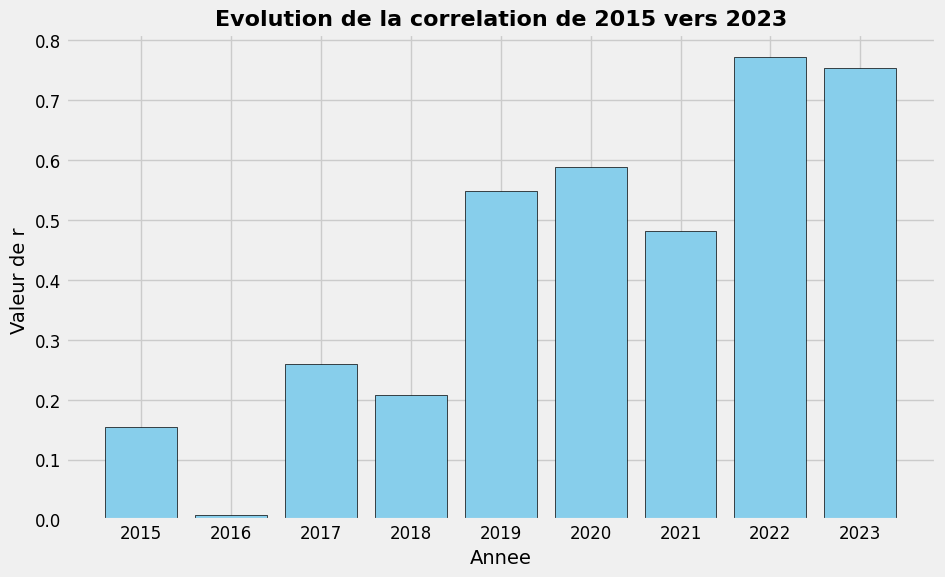

In [50]:
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(annee, list, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Evolution de la correlation de 2015 vers 2023', fontsize=16, fontweight='bold')
plt.xlabel('Annee', fontsize=14)
plt.ylabel('Valeur de r ', fontsize=14)

# Customize ticks
plt.xticks(annee, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

In [53]:
list = []
annee = []
for i in range(2015 ,2024):
    a = pci["{}".format(i)]
    b = vhi["{}".format(i)]
    statistic =  pearsonr(a,b)[0]
    p =  pearsonr(a,b)[1]
    s = "s"
    if p > 0.05 :
        s = "non significatif"
    else : 
        s = "significatif "
    list.append(statistic)
    annee.append(i)
    print("correlation pour l'annee {}".format(i) , "valeur de pearson"  , statistic , " " , p , " " , s )

correlation pour l'annee 2015 valeur de pearson -0.06125761754318658   0.8500005465444984   non significatif
correlation pour l'annee 2016 valeur de pearson 0.08272342448656396   0.7982689027686594   non significatif
correlation pour l'annee 2017 valeur de pearson 0.32401333214685174   0.3042100926608814   non significatif
correlation pour l'annee 2018 valeur de pearson 0.19294479004153106   0.5479680108929152   non significatif
correlation pour l'annee 2019 valeur de pearson 0.4828176041108376   0.11185363789446241   non significatif
correlation pour l'annee 2020 valeur de pearson 0.5008326787857482   0.097207682811297   non significatif
correlation pour l'annee 2021 valeur de pearson 0.5985304247899106   0.0397729837516681   significatif 
correlation pour l'annee 2022 valeur de pearson 0.7447700284017482   0.0054532687988533115   significatif 
correlation pour l'annee 2023 valeur de pearson 0.7768692331791636   0.0029534157670253985   significatif 


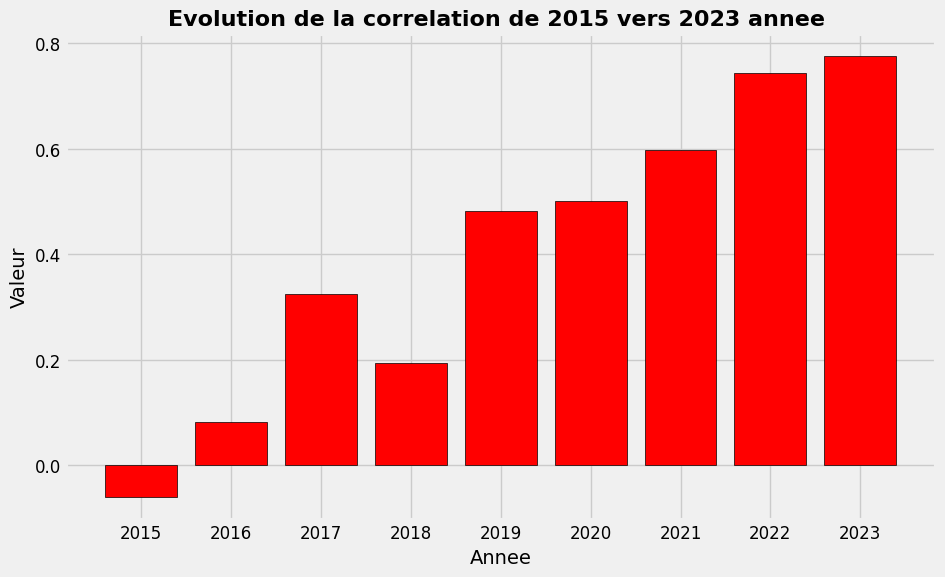

In [54]:
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(annee, list, color='red', edgecolor='black')
plt.style.use("fivethirtyeight")
# Add title and labels
plt.title('Evolution de la correlation de 2015 vers 2023 annee ', fontsize=16, fontweight='bold')
plt.xlabel('Annee', fontsize=14)
plt.ylabel('Valeur', fontsize=14)

# Customize ticks
plt.xticks(annee, fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines for better readability


# Show the plot
plt.show()